In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt



In [3]:
stock_symbol = "AAPL"

df = yf.download(stock_symbol, start="2018-01-01", end="2024-01-01")


/tmp/ipython-input-1791625365.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start="2018-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341873,40.351243,39.639298,39.850073,102223600
2018-01-03,40.334877,40.878204,40.271648,40.405135,118071600
2018-01-04,40.522209,40.625254,40.299728,40.407454,89738400
2018-01-05,40.983578,41.070228,40.526904,40.618239,94640000
2018-01-08,40.831348,41.126429,40.732985,40.831348,82271200


In [5]:
df["Next_Close"] = df["Close"].shift(-1)



In [6]:
df.dropna(inplace=True)


In [7]:
X = df[["Open", "High", "Low", "Volume"]]
y = df["Next_Close"]


Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


Linear Regression

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)


 Mean Squared Error

In [11]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 6.890052417903183


Plot Actual VS Predicted Prices

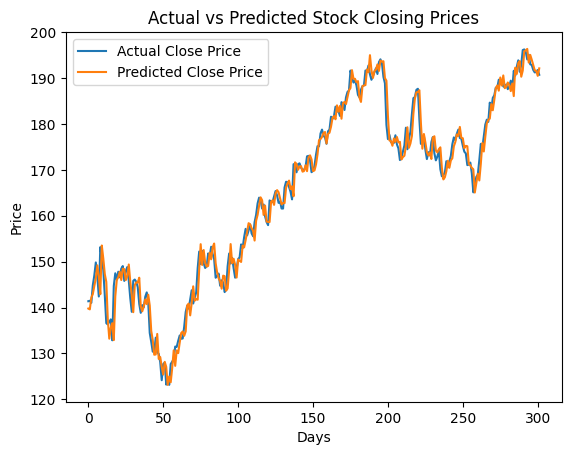

In [12]:
plt.figure()
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")
plt.title("Actual vs Predicted Stock Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()
